In [2]:
import os
import glob
import datetime
#import xarray as xr
import netCDF4
import matplotlib.pyplot as plt
import cmocean

import cartopy.crs as ccrs
import cartopy.feature as cfeature
coast = cfeature.GSHHSFeature(scale="f")
mainproj = ccrs.Mercator(central_longitude=-60.0, min_latitude=-70.0, max_latitude=40.0)
datacrs = ccrs.PlateCarree()

datadir = "/home/ctroupin/data/Altimetry/Canary/EddyTracking/"
outputdir = os.path.join(datadir, "tracking")
if not(os.path.exists(outputdir)):
    os.mkdir(outputdir)

datestart = datetime.datetime(1993, 1, 1)
dateend = datetime.datetime(1993, 12, 31)
ndays = 1 + (dateend - datestart).days
print(f"{ndays} days")


cyclonic_filelist = sorted(glob.glob(os.path.join(datadir, "*Cyclonic*nc")))
anticyclonic_filelist = sorted(glob.glob(os.path.join(datadir, "*Anticyclonic*nc")))

365 days


In [24]:
with netCDF4.Dataset(os.path.join(outputdir, "Canary_anticyclonic.nc")) as nc:
    print(nc)
    lon_a = nc.variables["longitude"][:]
    lat_a = nc.variables["latitude"][:]

with netCDF4.Dataset(os.path.join(outputdir, "Canary_cyclonic.nc")) as nc:
    print(nc)
    lon_c = nc.variables["longitude"][:]
    lat_c = nc.variables["latitude"][:]

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    track_extra_variables: lat_max,lon_max
    track_array_variables: 50
    array_variables: contour_lat_e,contour_lon_e,contour_lat_s,contour_lon_s,uavg_profile
    title: Anticyclonic
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    comment: Surface product; mesoscale eddies
    framework_used: https://github.com/AntSimi/py-eddy-tracker
    framework_version: v3.6.1
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention Standard Name Table
    date_created: 2024-12-05T09:47:58Z
    time_coverage_duration: P11322D
    time_coverage_start: 1993-01-01T00:00:00Z
    time_coverage_end: 2023-12-31T00:00:00Z
    dimensions(sizes): obs(81080), NbSample(50)
    variables(dimensions): uint16 amplitude(obs), float32 cost_association(obs), float32 effective_area(obs), float32 effective_contour_height(obs), int16 effective_contour_latitude(obs, NbSample), int16 effective_contour_l

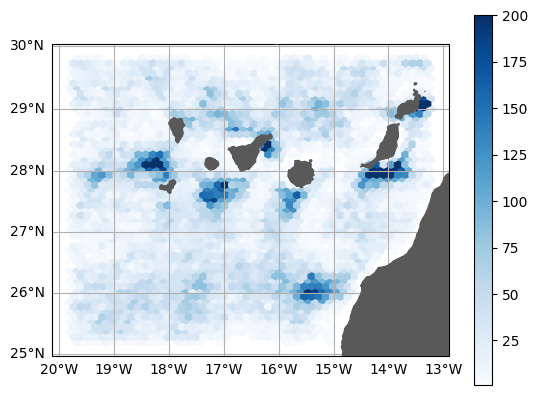

In [25]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
hx = ax.hexbin(lon_a, lat_a, transform=datacrs, gridsize=50, cmap=plt.cm.Blues, mincnt=1, vmax=200)
gl = ax.gridlines(draw_labels=True, zorder=3)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(coast, color=".35", zorder=5)
plt.colorbar(hx)
plt.show()

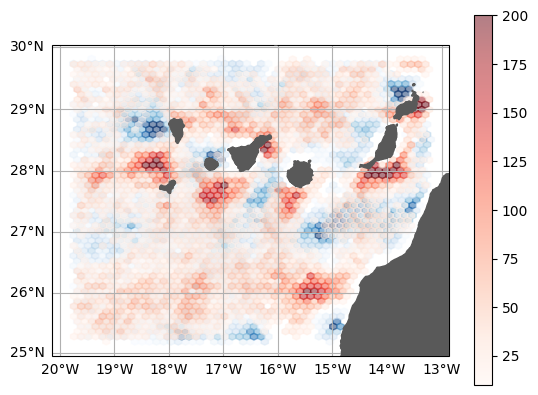

In [28]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
hx = ax.hexbin(lon_c, lat_c, transform=datacrs, gridsize=50, cmap=plt.cm.Blues, mincnt=10, alpha=0.5, vmax=200)
hx = ax.hexbin(lon_a, lat_a, transform=datacrs, gridsize=50, cmap=plt.cm.Reds, mincnt=10, alpha=0.5, vmax=200)

gl = ax.gridlines(draw_labels=True, zorder=3)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(coast, color=".35", zorder=5)
plt.colorbar(hx)
plt.show()

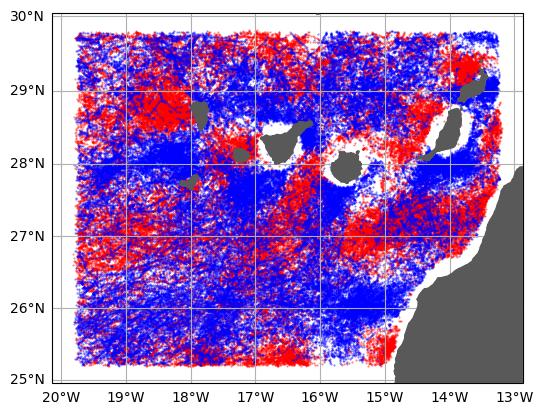

In [31]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
hx = ax.plot(lon_c, lat_c, "ro", ms=.5, transform=datacrs, alpha=0.5)
hx = ax.plot(lon_a, lat_a, "bo", ms=.5, transform=datacrs, alpha=0.5)

gl = ax.gridlines(draw_labels=True, zorder=3)
gl.top_labels = False
gl.right_labels = False
ax.add_feature(coast, color=".35", zorder=5)
plt.show()